# Section A

### 1 What are decision trees? What are the different types of decision trees?

A decision tree is a graphical representation of possible solutions to a decision based on certain conditions. Its 
called a decision tree because it starts with a single box (or root), which then branches off into a number of solutions, 
just like a tree

The different Types of Decision Trees are:
    Most popular decision tree algorithms (ID3, C4.5, CART) work by repeatedly partitioning the input space along 
    the dimensions containing the most information.

### 2. What are weak learners?

A weak learner is defined to be a classifier that is only slightly correlated with the true classification. 
Intern, a strong learner is a classifier that is arbitrarily well-correlated with the true classification.

### 3. As compared to an individual model, are ensemble classifiers always more accurate? If so, why?

Ensemble models have been extensively used in credit scoring applications and other areas because they considered to be more 
stable and more importantly predict better than single classifiers.They are also known to reduce"model bias and varience".If we 
predict the accuracy between the ensemble classifiers(Gradient boosting) and single classifiers(Logistic regression) the 
ensemble model gives the better accuracy then the ensemble. 

### 4. How do ensemble methods work for regression problems?

Ensemble methods is a machine learning technique that combines several base models in order to produce one optimal 
predictive model.Then,the predictions are then combined through the weighted sum(regression) to produce the final prediction

# Section B

### 5. Explain how bagging methods work. What are its advantages?

Bagging is a very good method in machine learning. Bagging aims to decrease the variance by lessening the bias 
in your predictive models. If you decrease the variance, you need not necessarily have to increase the size of 
your training set.

### 6. Explain how gradient boosting works.

Boosting is used if we get 50% accuracy then it is a weak predictor inorder to boost the weak predictor we are using a boosting
where Boosting is classified into two types:
    
    1.Adaptive boosting
    2.Gradient Descent boosting

A gradient descent procedure is used to minimize the loss when adding trees. Traditionally, gradient descent is used to 
minimize a set of parameters, such as the coefficients in a regression equation or weights in a neural network. After calculating
error or loss, the weights are updated to minimize that error.

### 7. Read the glass dataset using pandas. Build a classifier to classify the type of glass using:

In [4]:
import numpy as np
import pandas as pd

col_names=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']
Data=pd.read_csv('glass.csv',names=col_names)

In [5]:
Data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
Data.shape

(214, 10)

In [7]:
Data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
Data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

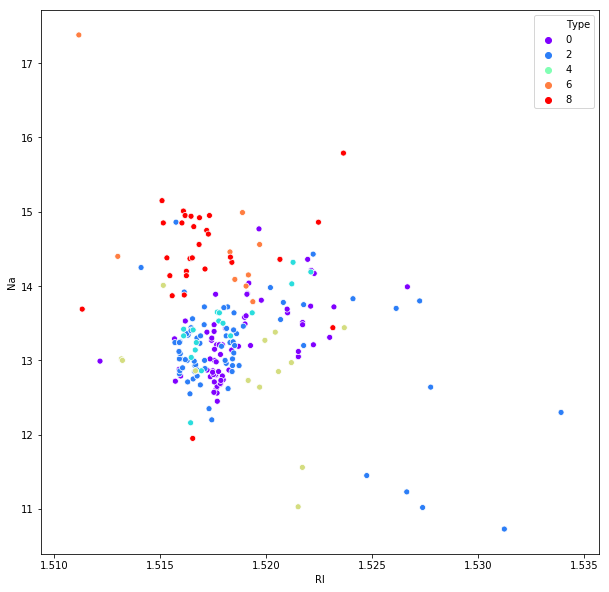

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
sns.scatterplot(x='RI',y='Na', hue='Type',data=Data,palette='rainbow')
plt.show()

In [13]:
Data.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [14]:
Data.Type=Data.Type.astype('category')

# Outlier Detection

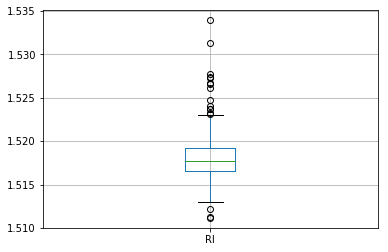

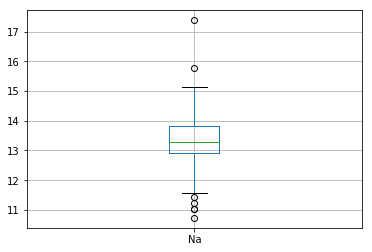

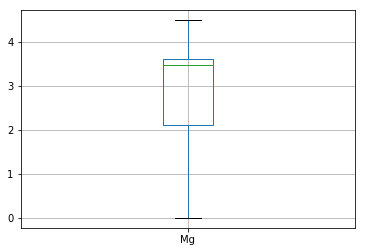

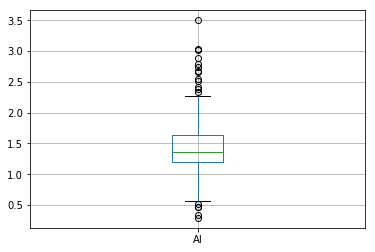

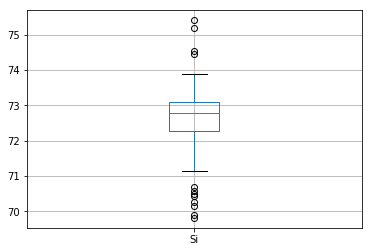

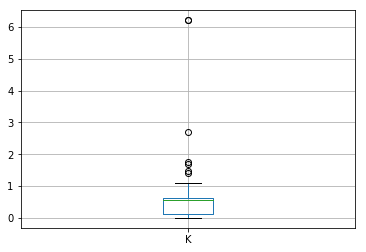

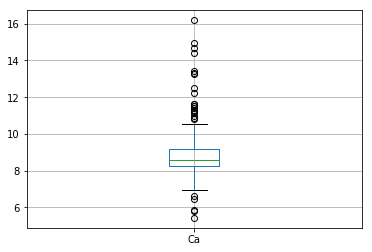

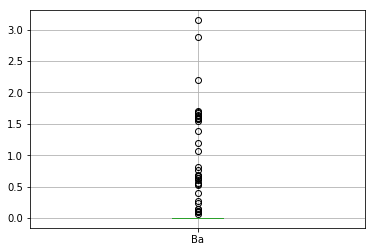

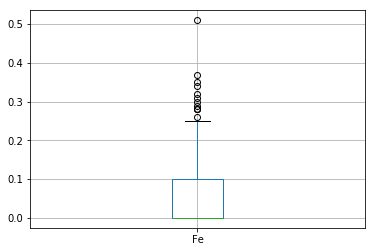

In [15]:
for column in Data.columns:
    if column != 'Type':
        plt.figure()
        Data.boxplot([column])

In [16]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

In [17]:
glass_std = stdsc.fit_transform(Data.drop('Type', axis=1))

In [18]:
Data# Over-Sampling

from imblearn.over_sampling import SMOTE

x = glass.drop('Type', axis=1)
y = glass.Type

sm = SMOTE(k_neighbors=5,random_state=1)

x_os, y_os =sm.fit_sample(x,y)

x_os.shape.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [19]:
glass_std = pd.DataFrame(glass_std, columns=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'])
glass_std.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


# Over-Sampling

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
x = Data.drop('Type', axis=1)
y = Data# Splitting the data

from sklearn.model_selection import train_test_split

x_train_os, x_test_os, y_train_os, y_test_os = train_test_split(x_os,y_os,test_size=0.3,random_state=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1).Type

In [22]:
sm = SMOTE(k_neighbors=5,random_state=1)

In [23]:
x_os, y_os =sm.fit_sample(x,y)

In [24]:
x_os.shape

(456, 9)

# Splitting the data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train_os, x_test_os, y_train_os, y_test_os = train_test_split(x_os,y_os,test_size=0.3,random_state=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

# Random Search CV

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [58]:
rfcl = RandomForestClassifier()
param = {'n_estimators': sp_randint(1, 80)}
randomCV = RandomizedSearchCV(rfcl, param_distributions=param, n_iter=80)
randomCV.fit(x_train_os,y_train_os)
randomCV.best_params_



C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'n_estimators': 46}

# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rfcl = RandomForestClassifier(n_estimators=46,oob_score=True)
rfcl.fit(x_train_os,y_train_os)
print('The accuracy score for Random Forest model with over sampling is %1.2f per cent' %((rfcl.score(x_test_os,y_test_os)*100)))

The accuracy score for Random Forest model with over sampling is 89.78 per cent


In [60]:
print('The accuracy score for Random forest without over sampling is %1.2f per cent'%((rfcl.oob_score_)*100))

The accuracy score for Random forest without over sampling is 88.71 per cent


# Ada Boosting Classifier

In [61]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier()
param = {'n_estimators': sp_randint(1, 80)}
randomCV = RandomizedSearchCV(abcl, param_distributions=param, n_iter=80)
randomCV.fit(x_train_os,y_train_os)
randomCV.best_params_

C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'n_estimators': 16}

In [62]:
abcl = AdaBoostClassifier(n_estimators=16)
abcl.fit(x_train_os,y_train_os)
print('The accuracy score for Adaptive Boosting model is %1.2f per cent' %((abcl.score(x_test_os,y_test_os)*100)))

The accuracy score for Adaptive Boosting model is 42.34 per cent


From the above that Random Forest gives the accuracy of about 89% but the adaboost classifier gives the accuracy very less of about 42.34

### 8. Compare the relative strengths of Bagging vs Boosting. In what situation would one be preferred over the other?

Bagging and Boosting are both ensemble methods in Machine Learning, whereas Bagging and Boosting are
similar in that they are both ensemble techniques, where a set of weak learners are combined to create a strong learner that 
obtains better performance than a single one.

The general principle of an ensemble method is to combine the predictions of several models built with a given learning algorithm
in order to improve robustness over a single model. Bagging is a method in ensemble for improving unstable estimation or 
classification schemes. whereas boosting is used to boost the accuracy of the predicted model.

# Section C

In [147]:
import warnings
warnings.filterwarnings('ignore')

Data=pd.read_csv('climate1.csv')

Since the Data set is not received properly we tend to remove the data and kept 360 rows alone for the model

In [120]:
Data.head()

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1


In [121]:
Data.shape

(360, 21)

In [122]:
Data.dtypes

Study                     int64
Run                       int64
vconst_corr             float64
vconst_2                float64
vconst_3                float64
vconst_4                float64
vconst_5                float64
vconst_7                float64
ah_corr                 float64
ah_bolus                float64
slm_corr                float64
efficiency_factor       float64
tidal_mix_max           float64
vertical_decay_scale    float64
convect_corr            float64
bckgrnd_vdc1            float64
bckgrnd_vdc_ban         float64
bckgrnd_vdc_eq          float64
bckgrnd_vdc_psim        float64
Prandtl                 float64
outcome                   int64
dtype: object

In [123]:
Data.isnull().sum()

Study                   0
Run                     0
vconst_corr             0
vconst_2                0
vconst_3                0
vconst_4                0
vconst_5                0
vconst_7                0
ah_corr                 0
ah_bolus                0
slm_corr                0
efficiency_factor       0
tidal_mix_max           0
vertical_decay_scale    0
convect_corr            0
bckgrnd_vdc1            0
bckgrnd_vdc_ban         0
bckgrnd_vdc_eq          0
bckgrnd_vdc_psim        0
Prandtl                 0
outcome                 0
dtype: int64

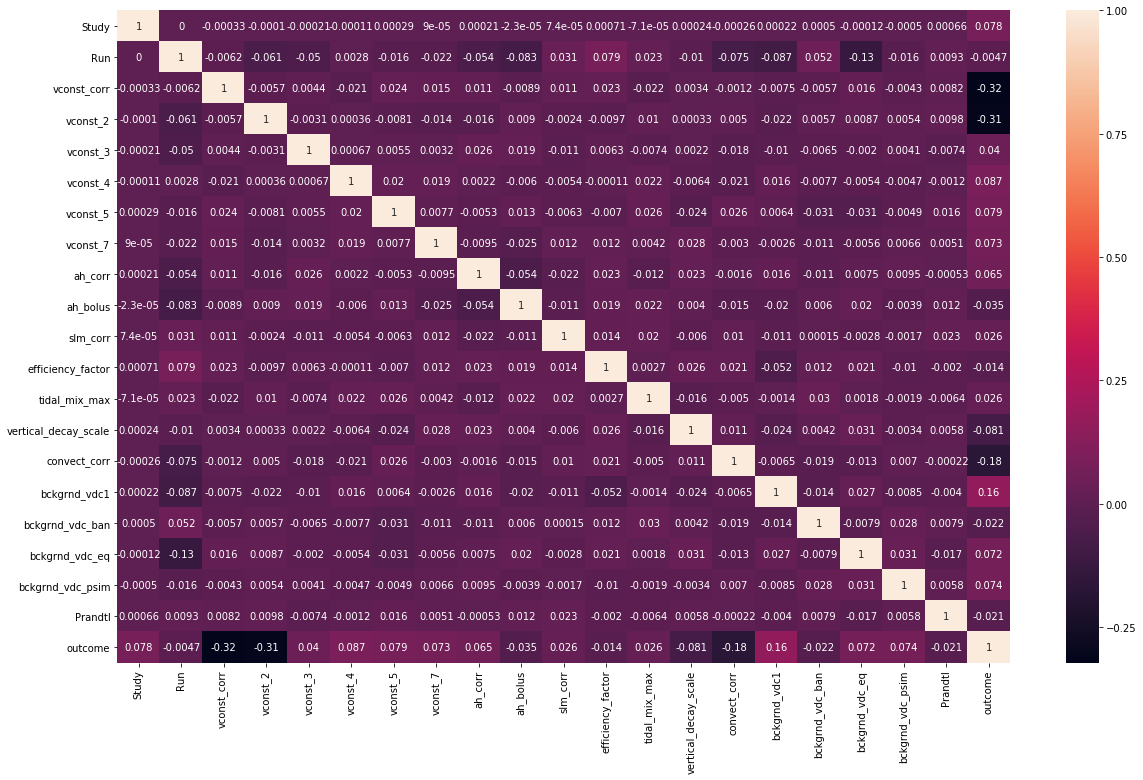

In [124]:
plt.figure(figsize=[20,12])
sns.heatmap(Data.corr(),annot=True)
plt.show()

# Over-Sampling

In [114]:
Data.outcome.value_counts()## totally unbalanced

1    328
0     32
Name: outcome, dtype: int64

In [138]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
#Using SMOTE to do the over-sampling

x = Data.drop('outcome', axis=1)
y = Data.outcome
sm = SMOTE(k_neighbors=5,random_state=1)
x,y =sm.fit_sample(x,y)
x= pd.DataFrame(x, columns=['Study', 'Run', 'vconst_corr', 'vconst_2', 'vconst_3', 'vconst_4',
       'vconst_5', 'vconst_7', 'ah_corr', 'ah_bolus', 'slm_corr',
       'efficiency_factor', 'tidal_mix_max', 'vertical_decay_scale',
       'convect_corr', 'bckgrnd_vdc1', 'bckgrnd_vdc_ban', 'bckgrnd_vdc_eq',
       'bckgrnd_vdc_psim', 'Prandtl'])
y=pd.DataFrame(y, columns=['outcome'])

climate = pd.concat([x,y],axis=1)
climate.shape

(656, 21)

In [127]:
climate.outcome.value_counts()### balanced data

1    328
0    328
Name: outcome, dtype: int64

# Modelling

## Split the data into test and train

In [128]:
# Split the data in test and train

x= climate.drop('outcome', axis=1)
y= climate.outcome

#If standard value is required
sc = StandardScaler()
x_std = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=2)

#If standard value id required
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

### 1. Random Forest Classifier

In [167]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier()
param = {'n_estimators': sp_randint(1, 80)}
randomCV = RandomizedSearchCV(rfcl, param_distributions=param, n_iter=80)
randomCV.fit(x,y)
randomCV.best_params_

{'n_estimators': 12}

In [168]:
rfcl = RandomForestClassifier(n_estimators=12)
rfcl.fit(x_train, y_train)
print('The accuracy score for Random Forest model is %1.2f per cent' %((rfcl.score(x_test,y_test)*100)))

The accuracy score for Random Forest model is 97.46 per cent


# Bagging Classifier

In [169]:
from sklearn.ensemble import BaggingClassifier

In [170]:
bgcl = BaggingClassifier()
param = {'n_estimators': sp_randint(1, 80)}
randomCV = RandomizedSearchCV(bgcl, param_distributions=param, n_iter=80)
randomCV.fit(x,y)
randomCV.best_params_

{'n_estimators': 16}

In [183]:
bgcl = BaggingClassifier(n_estimators=16)
bgcl.fit(x_train, y_train)
print('The accuracy score for Bagging Classifier model is %1.2f per cent' %((bgcl.score(x_test,y_test)*100)))

The accuracy score for Bagging Classifier model is 96.45 per cent


### 3. Ada Boost Classifier

In [172]:
abcl = AdaBoostClassifier()
param = {'n_estimators': sp_randint(1, 80)}
randomCV = RandomizedSearchCV(abcl, param_distributions=param, n_iter=80)
randomCV.fit(x,y)
randomCV.best_params_

{'n_estimators': 39}

In [184]:
abcl = AdaBoostClassifier(n_estimators=39)
abcl.fit(x_train, y_train)
print('The accuracy score for Adaptive Boosting model is %1.2f per cent' %((abcl.score(x_test,y_test)*100)))

The accuracy score for Adaptive Boosting model is 92.39 per cent


### 4. Gradient Boost Classifier

In [174]:
gbcl = GradientBoostingClassifier()
param = {'n_estimators': sp_randint(1, 80)}
randomCV = RandomizedSearchCV(gbcl, param_distributions=param, n_iter=80)
randomCV.fit(x,y)
randomCV.best_params_

{'n_estimators': 76}

In [186]:
gbcl = GradientBoostingClassifier(n_estimators = 76)
gbcl.fit(x_train,y_train)
print('The accuracy score for Gradient Boosting model is %1.2f per cent' %((gbcl.score(x_test,y_test)*100)))

The accuracy score for Gradient Boosting model is 97.97 per cent


### 5. XG Boosting Classifier

In [176]:
xgcl = xgb.XGBClassifier()
param = {'n_estimators': sp_randint(1, 80)}
randomCV = RandomizedSearchCV(xgcl, param_distributions=param, n_iter=80)
randomCV.fit(x,y)
randomCV.best_params_

{'n_estimators': 75}

In [187]:
xgcl = xgb.XGBClassifier(n_estimators=75)
xgcl.fit(x_train, y_train)
print('The accuracy score for XG Boost model is %1.2f per cent' %((xgcl.score(x_test,y_test)*100)))

The accuracy score for XG Boost model is 97.97 per cent


In [188]:
models=[]
models.append(('Random Forest   ', rfcl))
models.append(('Bagging Classifier', bgcl))
models.append(('Ada Boosting     ',abcl))
models.append(('Gradient Boosting',gbcl))
models.append(('XG Boost Classifier',xgcl))

In [189]:
from sklearn import model_selection

In [190]:
results= []
names= []

for name,model in models:
    kfold= model_selection.KFold(n_splits = 10, random_state=2, shuffle=True)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s:\t %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)

Random Forest   :	 0.919444 (0.029001)
Bagging Classifier:	 0.930556 (0.033449)
Ada Boosting     :	 0.936111 (0.030556)
Gradient Boosting:	 0.930556 (0.031056)
XG Boost Classifier:	 0.927778 (0.025459)


From the above the AdaBoosting gives the higher accuracy then the other algorithm

On the comparison of Bagging and boosting  the Ada Boosting gives the higher accuracy then the bagging

### Boostrap algorithm

In [191]:
from sklearn.utils import resample
temp = pd.concat([x,y],axis=1) #So that the taget variable will be at the last column
values= temp.values

iterations = 50
n_size = int(len(values)*0.7)

hystats = []

for i in range(iterations):
    train = resample(values,n_samples=n_size)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    
    hycl = VotingClassifier(estimators = [('RandomForest', rfcl),('Gradient Boosting', gbcl),('Bagging Classifier', bgcl),
                                      ('XG Boost', xgcl)])
    hycl.fit(train[:,:-1] ,train[:,-1])
    hyscore = hycl.score(test[:,:-1],test[:,-1])
    hystats.append(hyscore)

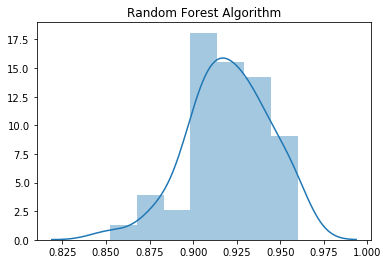

The  95 % confidence interval is:  87.72 % to  95.7 %


In [192]:
sns.distplot(hystats)
plt.title('Random Forest Algorithm')
plt.show()

confidence = 95
lower = (100-confidence)/2
upper = confidence + lower

print('The ',confidence, '% confidence interval is: ',round(np.percentile(hystats,lower),4)*100,
      '% to ',round(np.percentile(hystats,upper),4)*100,'%')

In [163]:
### 2.	What are the most important factors affecting simulation crashes in climate model

x= Data.drop('outcome', axis=1)
y= Data.outcome
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [164]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [165]:
vif

,VIF Factor,features
0,8.709026,Study
1,3.878133,Run
2,3.850776,vconst_corr
3,3.806203,vconst_2
4,3.819730,vconst_3
5,3.838154,vconst_4
6,3.854702,vconst_5
7,3.844083,vconst_7
8,3.827718,ah_corr
9,3.827643,ah_bolus


The Study is the attributes affecting simulation crashes in climate model which has the high VIF